In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
!pip install bayesian-optimization
# !pip install catboost
# !pip install deap update_checker tqdm
# !pip install tpot


# Any results you write to the current directory are saved as output.
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
3
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.tabular import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from scipy.stats import norm, skew
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import lightgbm as lgb
from sklearn import svm

import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


from fastai.tabular import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from scipy.stats import norm, skew
from sklearn.ensemble import IsolationForest
%matplotlib inline
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/india-ml-hiring/sample_submission.csv
/kaggle/input/india-ml-hiring/test.csv
/kaggle/input/india-ml-hiring/train.csv


In [70]:
os.listdir('../input/')

['india-ml-hiring']

In [71]:


train = pd.read_csv('../input/india-ml-hiring/train.csv');test = pd.read_csv('../input/india-ml-hiring/test.csv');sam = pd.read_csv('../input/india-ml-hiring/sample_submission.csv')
y = train['m13'];train.drop('m13', axis=1, inplace=True);

In [72]:


test.replace('01/02/12', '01/02/2012', inplace=True);test.replace('01/01/12', '01/01/2012', inplace=True);test.replace('01/03/12', '01/03/2012', inplace=True)
test.replace('Apr-12', '04/2012', inplace=True);test.replace('Mar-12', '03/2012', inplace=True);test.replace('May-12', '05/2012', inplace=True);test.replace('Feb-12', '02/2012', inplace=True)
train['origination_date'] = pd.to_datetime(train['origination_date'].astype(str), format='%Y-%m-%d');train['first_payment_date'] = pd.to_datetime(train['first_payment_date'].astype(str), format='%m/%Y');
test['origination_date'] = pd.to_datetime(test['origination_date'].astype(str), format='%d/%m/%Y');test['first_payment_date'] = pd.to_datetime(test['first_payment_date'].astype(str), format='%m/%Y')

In [73]:


train['omo'] = pd.DatetimeIndex(train['origination_date']).month;test['omo'] = pd.DatetimeIndex(test['origination_date']).month
train['ofo'] = pd.DatetimeIndex(train['first_payment_date']).month;test['ofo'] = pd.DatetimeIndex(test['first_payment_date']).month
# train['diff'] = train['first_payment_date'] - train['origination_date']
# test['diff'] = test['first_payment_date'] - test['origination_date']
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m5,m6,m7,m8,m9,m10,m11,m12,omo,ofo
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,0,1,0,0,0,0,0,3,5
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,0,0,0,1,0,1,3
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,0,0,0,1,3
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,0,1,1,1,1,2,4
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,4,5,6,7,8,9,10,11,2,4


In [74]:


def joint(train):
    z=pd.DataFrame((train['first_payment_date']-train['origination_date']).astype(str))
    x = [0]*train.shape[0]
    for i in range(len(x)):
        x[i] = int(z.iloc[i, 0][:2])
    train['hh'] = x
    return train
train = joint(train);test = joint(test)

In [75]:
test.shape

(35866, 31)

In [76]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m6,m7,m8,m9,m10,m11,m12,omo,ofo,hh
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,1,0,0,0,0,0,3,5,61
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,0,0,1,0,1,3,60
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,0,0,1,3,60
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,1,1,1,1,2,4,60
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,5,6,7,8,9,10,11,2,4,60


In [77]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'omo', 'ofo', 'hh'],
      dtype='object')

In [78]:


# cols = [ 'source', 'financial_institution', 'interest_rate',
#        'unpaid_principal_bal', 'loan_term', 
#         'loan_to_value', 'number_of_borrowers',
#        'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
#        'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
#        'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12','hh',
#        ]

dro = ['loan_id',  'origination_date', 'first_payment_date']

train.drop(dro, axis=1, inplace=True)
test.drop(dro, axis=1, inplace=True)

# train = train[cols]
# test = test[cols]
train.head()

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data = pd.concat([train, test])
dum = ['source', 'financial_institution', 'loan_purpose']


# for i in dum:
#     data[i] = le.fit_transform(data[i])
dumm = pd.get_dummies(data[dum])
data.drop(dum, axis=1, inplace=True)
data = pd.concat([data, dumm], axis=1)



train = data.iloc[:train.shape[0] , :]
test = data.iloc[train.shape[0]: , :]
train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [79]:


asb = ['interest_rate',
       'unpaid_principal_bal', 'loan_term', 
        'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score','hh'
       ]

asb = np.array(asb)
asb.tolist()
print(asb)


skewed_feats = train[asb].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

# skewnessBox = skewness[(skewness.Skew)<10]
# skewnessBox = skewnessBox[(skewness.Skew)>3.75]

# skewnessSquare = skewness[(skewness.Skew)<-0.75]
# skewnessSquare = skewnessSquare[(skewness.Skew)>-10]

# from scipy.special import boxcox1p
# skewed_features1 = skewnessBox.index
# skewed_features2 = skewnessSquare.index
# lam = 0.25
# for feat in skewed_features1:
#     train[feat] = boxcox1p(train[feat], lam)
#     test[feat] = boxcox1p(test[feat], lam)
# for feat in skewed_features2:
#     train[feat] = np.square(train[feat])
#     test[feat] = np.square(test[feat])


['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value' 'number_of_borrowers' 'debt_to_income_ratio'
 'borrower_credit_score' 'insurance_percent' 'co-borrower_credit_score' 'hh']


,Skew
insurance_percent,2.743655
unpaid_principal_bal,0.897512
hh,0.467272
interest_rate,0.051326
debt_to_income_ratio,-0.194301
co-borrower_credit_score,-0.362469
number_of_borrowers,-0.379392
loan_term,-0.692939
loan_to_value,-0.765241
borrower_credit_score,-3.570899


In [80]:

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import sklearn
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *

import tpot

xg = XGBClassifier()
lg = LGBMClassifier()
cg = CatBoostClassifier()


# LogisticRegression()
# RandomForestClassifier()


from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.discriminant_analysis import *
from sklearn.ensemble import *
from sklearn.linear_model import *
lg = LGBMClassifier()
xg = XGBClassifier()
cat= CatBoostClassifier()
li = LogisticRegression() 
# lii = Ridge() 
rf = RandomForestClassifier()
vr = VotingClassifier([ ('lg', cat),  ('xg', rf),  ('gh', lg), ('gg',  li)] , voting='soft')
#rf = RandomForestRegressor(n_estimators=2000) 

cg = xg

In [81]:
cg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in train.columns:
    train[i] = sc.fit_transform(pd.DataFrame(train[i]))
    test[i] = sc.transform(pd.DataFrame(test[i]))

In [15]:
import sklearn
from sklearn.isotonic import IsotonicRegression
# cg=sklearn.svm.classes.SVC()
cg = XGBClassifier()
# cg.fit(train, y)
# y_pred = cg.predict_proba(test)[:, 1]

In [ ]:
# y_pred

In [ ]:
# sam['m13'] = [0]*len(y_pred)
# for i in range(len(sam)):
#     if y_pred1[i] > 0.075:
#         sam.iloc[i, 1]=1
# #     print(i)
# print(sam['m13'].value_counts())
# sam.to_csv('sammu.csv', index=False)
# from IPython.display import FileLinks
# FileLinks('.')

In [ ]:
# train['xg'] = cg.predict_proba(train)[:, 1]
# test['xg'] = cg.predict_proba(test)[:, 1]

In [ ]:
# ,,
# X = train
# y = y

# from sklearn.model_selection import KFold
# import lightgbm as lgb
# from sklearn.metrics import *
# def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=5, random_seed=6,  output_process=False):
#     # prepare data
#     train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
#     # parameters
#     def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight, n_estimators, learning_rate):
#         params = {'application':'binary',
#                   'num_iterations': int(n_estimators+0.5), 'learning_rate':learning_rate, 'early_stopping_round':100, 'metric':'binary_logloss'}
#         params["num_leaves"] = int(round(num_leaves))
#         params['feature_fraction'] = max(min(feature_fraction, 1), 0)
#         params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
#         params['max_depth'] = int(round(max_depth))
#         params['lambda_l1'] = max(lambda_l1, 0)
#         params['lambda_l2'] = max(lambda_l2, 0)
#         params['min_split_gain'] = min_split_gain
#         params['min_child_weight'] = min_child_weight
#         params['objective'] = 'classfication'
        
#         kf = KFold(n_splits=n_folds)
#         kf.get_n_splits(X)
        
#         ret=[0]*n_folds
#         i=0
#         for train_index, test_index in kf.split(X):
#         	X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
#         	y_train, y_test = y[train_index], y[test_index]
          
#         	lg = LGBMClassifier(
#                             bagging_fraction=params['bagging_fraction'],
#                             feature_fraction=params['feature_fraction'],
#                             lambda_l1=params['lambda_l1'],
#                             lambda_l2=params['lambda_l2'],
#                             learning_rate=params['learning_rate'],
#                             max_depth=int(params['max_depth']+0.5),
#                             min_child_weight=params['min_child_weight'],
#                             min_split_gain=params['min_split_gain'],
#                             num_iterations=int(params['num_iterations']+0.50),
#                             num_leaves=int(params['num_leaves']+0.5),
# #                             objective='classifier',
#                             metric='binary_logloss',
              
#           )
#         	lg.fit(X_train, y_train)
#         	y_pred = lg.predict(X_test)
#         	ret[i]= f1_score(y_test, y_pred)
#         	print(ret[i])
#         	i+=1
#         x=0
#         for i in range(n_folds):
#         	x+=ret[i]
        
        
        
#         #cv_result = lgb.cv(params,  train_data, nfold=n_folds, seed=random_seed, stratified=False, verbose_eval =200, metrics=['rmse'])
#         #print(cv_result)
#         return -1*x/n_folds
#     # range 
#     lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (8, 128),
#                                             'feature_fraction': (0.1, 0.9),
#                                             'bagging_fraction': (0.8, 1),
#                                             'max_depth': (5, 10),
#                                             #'objective': 'regression',
#                                             'lambda_l1': (0, 5),
#                                             'lambda_l2': (0, 3),
#                                             'min_split_gain': (0.001, 0.1),
#                                             'min_child_weight': (5, 50),
#                                             'n_estimators' : (300, 5000),
#                                             'learning_rate' : (0.01, 0.5)
#                                            }, random_state=0)
                                           
#     # optimize
    
#     lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
#     # output optimization process
#     if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
#     #return best parameters
#     return lgbBO

# opt_params = bayes_parameter_opt_lgb(X, y, init_round=3, opt_round=5, n_folds=5, random_seed=42)
# opt_params

In [ ]:
##########################stack


In [16]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
    train=pd.DataFrame(train)
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices, :],train.iloc[val_indices, :]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict_proba(x_val)[:, 1])
        test_pred=np.append(test_pred,model.predict_proba(test)[:, 1])
    return pd.DataFrame(test_pred.reshape(-1,1)),pd.DataFrame(train_pred)

In [17]:
colss = [0]
trains = pd.DataFrame(columns=colss, index=range(len(train)))
tests = pd.DataFrame(columns=colss, index=range(len(test)))

trains.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
# model1 = lg
# tests[0] ,trains[0]=Stacking(model=model1,n_fold=10, train=train,test=test,y=y)

In [ ]:
# train['cat'] = trains[0]
# test['cat'] = tests[0]

In [ ]:
# from sklearn.utils.testing import all_estimators
# estimators = all_estimators()
# est=[]
# for name, class_ in estimators:
#     if hasattr(class_, 'predict_proba'):
#         est.append(class_)
#         print(name)

In [ ]:
# est

In [ ]:
# est.remove(sklearn.calibration.CalibratedClassifierCV)
# est.remove( sklearn.neural_network.multilayer_perceptron.MLPClassifier)
# est.remove( sklearn.multioutput.MultiOutputClassifier)
# est.remove( sklearn.svm.classes.NuSVC)
# est.remove( sklearn.multiclass.OneVsRestClassifier)
# est.remove( sklearn.pipeline.Pipeline)
# est.remove( sklearn.feature_selection.rfe.RFE)
# est.remove( sklearn.feature_selection.rfe.RFECV)
# est.remove( sklearn.model_selection._search.RandomizedSearchCV)
# est.remove( sklearn.svm.classes.SVC)
# est.remove( sklearn.ensemble.voting.VotingClassifier)
# est.remove( sklearn.multiclass._ConstantPredictor)
# est.remove( sklearn.naive_bayes.MultinomialNB)
# est.remove( sklearn.naive_bayes.ComplementNB)

# est

In [ ]:
# i=0
# for model in est:
#     try:
#         m = model()
#         tests[i] ,trains[i]=Stacking(model=m,n_fold=10, train=train,test=test,y=y)
#         print(i)
#     except:
#         print(model)
#     i+=1

In [ ]:
# trains.head()

In [ ]:
# tests[2] ,trains[2]=Stacking(model=XGBClassifier(),n_fold=10, train=train,test=test,y=y)

In [ ]:
# tests.drop(20, axis=1, inplace=True)
# trains.drop(20, axis=1, inplace=True)

In [ ]:
# trains.isnull().sum().sum()

In [ ]:
# bb=np.nan_to_num(tests)

In [ ]:
# bb.shape

In [ ]:
# xg = LogisticRegression()
# xg.fit(aa, y)
# y_pred = xg.predict_proba(bb)[:, 1]

In [ ]:
# sam = pd.read_csv('../input/india-ml-hiring/sample_submission.csv')

In [ ]:
# sam['m13'] = tests[2]
# for i in range(len(sam)):
#     if sam.iloc[i, 1] > 0.075:
#         sam.iloc[i, 1]=1
#     else:
#         sam.iloc[i, 1]=0
# sam.to_csv('sammu.csv', index=False)
# from IPython.display import FileLinks
# FileLinks('.')
# # sam.head()

In [ ]:
# sam['m13'].value_counts()

In [ ]:
########################################################################  Undersampling ##############################################################################

In [22]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [23]:
# train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'source_X', 'loan_purpose_C86'], axis=1, inplace=True)

In [24]:
sts = test.copy()

In [25]:
df = train.copy()
df['Class'] = y
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:y.value_counts()[1]]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Class
295,0.826517,-1.109357,0.754428,-0.661125,0.828137,0.232018,-1.182804,-0.344138,0.550834,-0.057163,...,-0.101912,-0.12516,-0.250914,-0.104723,-0.075106,-0.127133,-1.00749,1.717508,-0.566717,1
114030,-0.258039,0.878704,0.754428,0.726829,0.828137,-0.179050,-0.164101,-0.344138,0.752434,-0.057163,...,-0.101912,-0.12516,-0.250914,-0.104723,-0.075106,-0.127133,-1.00749,-0.582239,1.764550,0
98516,-0.041128,1.820417,0.754428,0.668997,0.828137,-1.412253,-0.329936,-0.344138,0.914760,-0.057163,...,-0.101912,-0.12516,-0.250914,-0.104723,-0.075106,-0.127133,-1.00749,-0.582239,1.764550,0
5471,0.284239,-0.655940,0.754428,1.594300,0.828137,-0.795652,0.309715,3.361200,0.804797,-0.057163,...,-0.101912,-0.12516,-0.250914,-0.104723,-0.075106,-0.127133,-1.00749,-0.582239,1.764550,0
215,0.826517,-1.231431,0.754428,-0.718956,-1.207529,1.362454,1.209964,-0.344138,-1.203344,-0.057163,...,-0.101912,-0.12516,-0.250914,-0.104723,-0.075106,-0.127133,-1.00749,-0.582239,1.764550,1


In [26]:

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Train: [ 23210  23211  23212  23213 ... 116054 116055 116056 116057] Test: [    0     1     2     3 ... 23209 23353 23515 23596]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [23210 23211 23212 23213 ... 46421 46693 47091 47210]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [46422 46423 46424 46425 ... 70298 70349 70439 70455]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [69630 69631 69632 69633 ... 92847 92848 92849 92850]
Train: [    0     1     2     3 ... 92847 92848 92849 92850] Test: [ 92400  92422  92437  92543 ... 116054 116055 116056 116057]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.994518 0.005482]
[0.994528 0.005472]


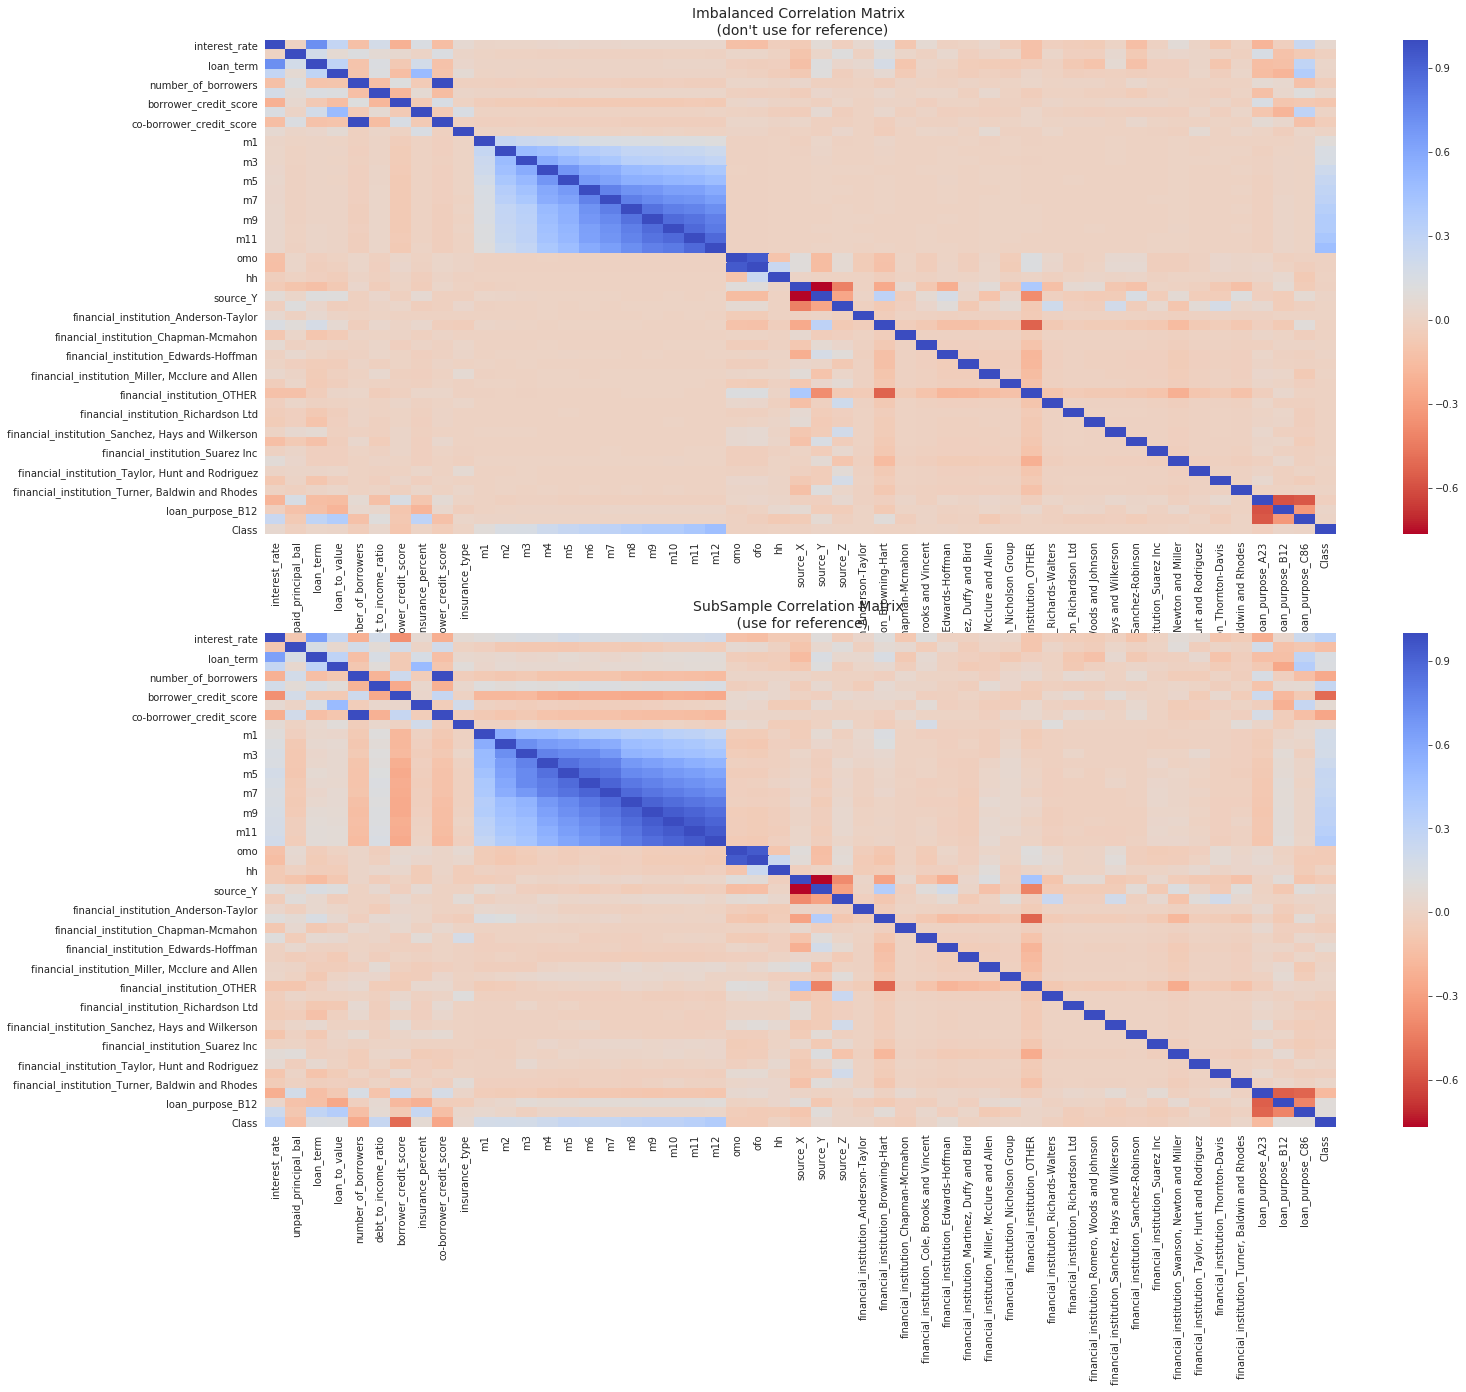

In [27]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

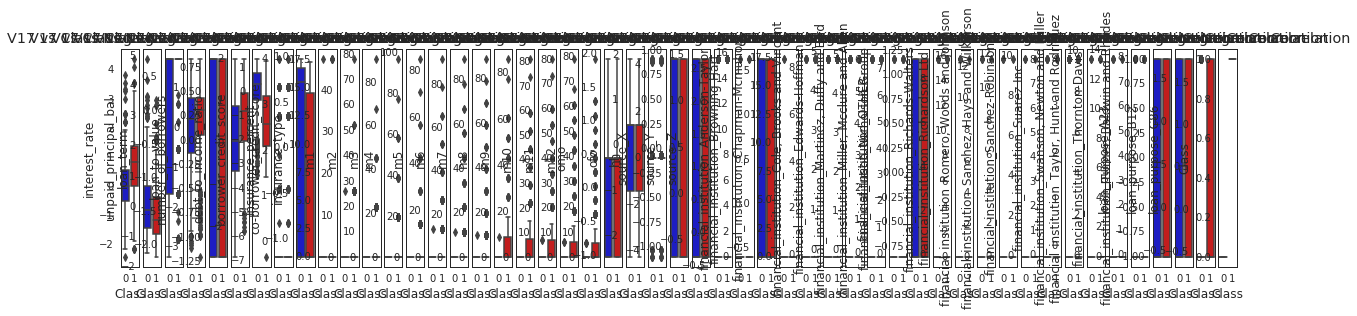

In [28]:
f, axes = plt.subplots(ncols=len(df.columns), figsize=(20,4))

colors = ["#0101DF", "#DF0101"]
for i in range(len(df.columns)):
    # Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=df[df.columns[i]], data=new_df, palette=colors, ax=axes[i])
    axes[i].set_title('V17 vs Class Negative Correlation')



plt.show()

In [29]:
# and cross-validating sets.
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [30]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [33]:
# Let's implement simple classifiers



classifiers = {
    "LogisiticRegression": LogisticRegression(),
#     "a" : log_reg,
#     "KNearest": KNeighborsClassifier(n_neighbors=20),
#     "b" : knears_neighbors,
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "xgboost" : XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
#     "LDA" : LinearDiscriminantAnalysis(),
#     "QDA" : QuadraticDiscriminantAnalysis(),
#     "lg" : lg,
#     "catboost" : cat,
}
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 83.0 % accuracy score
Classifiers:  SVC Has a training score of 81.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 74.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 82.0 % accuracy score


In [34]:

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


NameError: name 'log_reg' is not defined

In [35]:

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


In [36]:

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


In [37]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:

# # Support Vector Classifier
# svc_params = { 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_
# svc

In [39]:

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  83.38%
Knears Neighbors Cross Validation Score 79.54%
DecisionTree Classifier Cross Validation Score 79.65%


In [42]:

# svc_score = cross_val_score(svc, X_train, y_train, cv=5)
# print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')


In [43]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 23210  23211  23212  23213 ... 116054 116055 116056 116057] Test: [    0     1     2     3 ... 23209 23353 23515 23596]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [23210 23211 23212 23213 ... 46421 46693 47091 47210]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [46422 46423 46424 46425 ... 70298 70349 70439 70455]
Train: [     0      1      2      3 ... 116054 116055 116056 116057] Test: [69630 69631 69632 69633 ... 92847 92848 92849 92850]
Train: [    0     1     2     3 ... 92847 92848 92849 92850] Test: [ 92400  92422  92437  92543 ... 116054 116055 116056 116057]
NearMiss Label Distribution: Counter({0: 636, 1: 636})


In [44]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

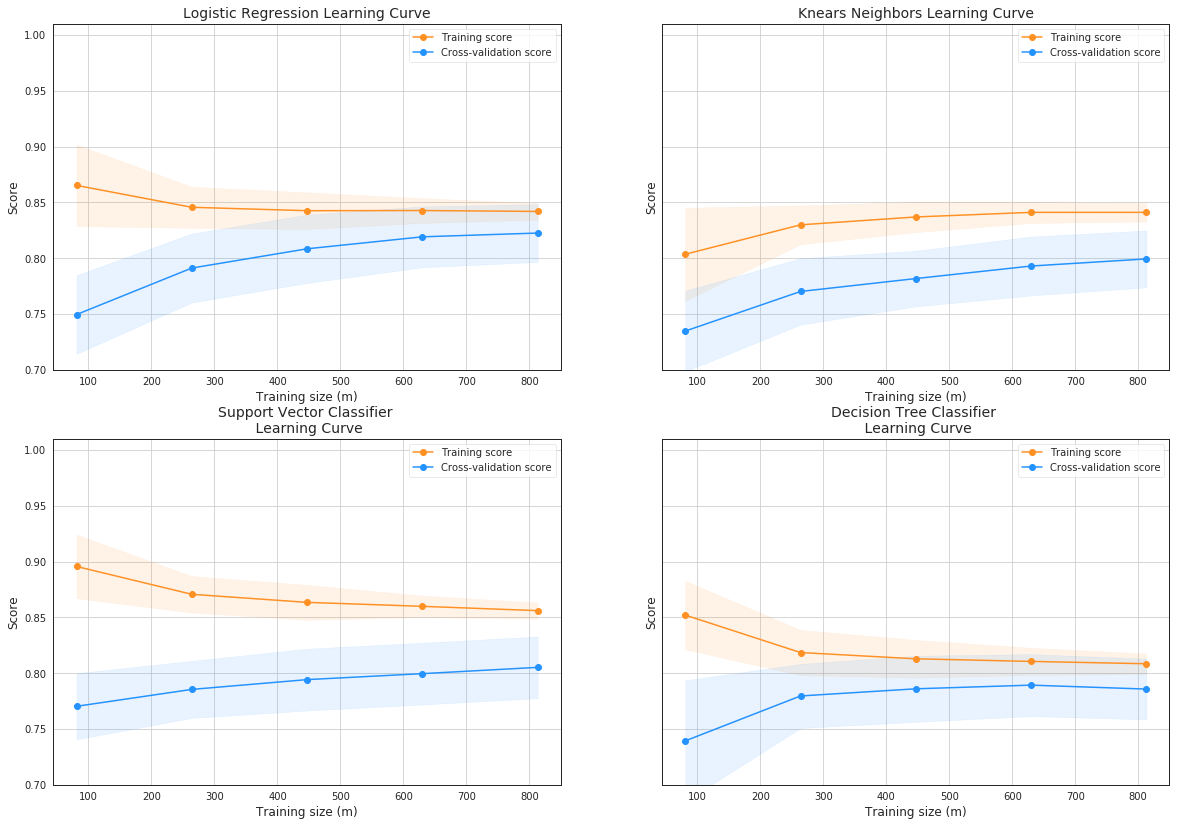

In [45]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, SVC(), tree_clf, X_train, y_train, (0.70, 1.01), cv=cv, n_jobs=4)

In [46]:
svc = SVC()

In [47]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [48]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8879667086933317
KNears Neighbors:  0.7947371270778061
Support Vector Classifier:  0.8671596420256336
Decision Tree Classifier:  0.796141023955199


In [49]:
original_Xtest.shape

(23211, 50)

In [85]:
# log_reg.fit(train, y)
y_pred = log_reg.predict_proba(test)[:, 1]

In [87]:
pd.Series(y_pred).unique()

array([0.305053, 0.289213, 0.668367, 0.409094, ..., 0.909454, 0.87053 , 0.569913, 0.976803])

In [53]:
# sam['m13'] = [0]*len(y_pred)
# for i in range(len(sam)):
#     if y_pred[i] > 0.95:
#         sam.iloc[i, 1]=1
# print(sam['m13'].value_counts())
# sam.to_csv('sammu.csv', index=False)
# from IPython.display import FileLinks
# FileLinks('.')

In [56]:
train

array([    0,     1,     2,     3, ..., 74275, 74276, 74402, 74426])

In [67]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
!pip install bayesian-optimization
# !pip install catboost
# !pip install deap update_checker tqdm
# !pip install tpot


# Any results you write to the current directory are saved as output.
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
3
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.tabular import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from scipy.stats import norm, skew
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import lightgbm as lgb
from sklearn import svm

import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


from fastai.tabular import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from scipy.stats import norm, skew
from sklearn.ensemble import IsolationForest
%matplotlib inline
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
os.listdir('../input/')

train = pd.read_csv('../input/india-ml-hiring/train.csv')
test = pd.read_csv('../input/india-ml-hiring/test.csv')
sam = pd.read_csv('../input/india-ml-hiring/sample_submission.csv')
y = train['m13'];train.drop('m13', axis=1, inplace=True);

test.replace('01/02/12', '01/02/2012', inplace=True);test.replace('01/01/12', '01/01/2012', inplace=True);test.replace('01/03/12', '01/03/2012', inplace=True)
test.replace('Apr-12', '04/2012', inplace=True);test.replace('Mar-12', '03/2012', inplace=True);test.replace('May-12', '05/2012', inplace=True);test.replace('Feb-12', '02/2012', inplace=True)
train['origination_date'] = pd.to_datetime(train['origination_date'].astype(str), format='%Y-%m-%d');train['first_payment_date'] = pd.to_datetime(train['first_payment_date'].astype(str), format='%m/%Y');
test['origination_date'] = pd.to_datetime(test['origination_date'].astype(str), format='%d/%m/%Y');test['first_payment_date'] = pd.to_datetime(test['first_payment_date'].astype(str), format='%m/%Y')

train['omo'] = pd.DatetimeIndex(train['origination_date']).month;test['omo'] = pd.DatetimeIndex(test['origination_date']).month
train['ofo'] = pd.DatetimeIndex(train['first_payment_date']).month;test['ofo'] = pd.DatetimeIndex(test['first_payment_date']).month
# train['diff'] = train['first_payment_date'] - train['origination_date']
# test['diff'] = test['first_payment_date'] - test['origination_date']
train.head()

def joint(train):
    z=pd.DataFrame((train['first_payment_date']-train['origination_date']).astype(str))
    x = [0]*train.shape[0]
    for i in range(len(x)):
        x[i] = int(z.iloc[i, 0][:2])
    train['hh'] = x
    return train
train = joint(train);test = joint(test)

# cols = [ 'source', 'financial_institution', 'interest_rate',
#        'unpaid_principal_bal', 'loan_term', 
#         'loan_to_value', 'number_of_borrowers',
#        'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
#        'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
#        'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12','hh',
#        ]

dro = ['loan_id',  'origination_date', 'first_payment_date']

train.drop(dro, axis=1, inplace=True)
test.drop(dro, axis=1, inplace=True)

# train = train[cols]
# test = test[cols]
train.head()

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data = pd.concat([train, test])
dum = ['source', 'financial_institution', 'loan_purpose']


# for i in dum:
#     data[i] = le.fit_transform(data[i])
dumm = pd.get_dummies(data[dum])
data.drop(dum, axis=1, inplace=True)
data = pd.concat([data, dumm], axis=1)



train = data.iloc[:train.shape[0] , :]
test = data.iloc[train.shape[0]: , :]
train.head()

asb = ['interest_rate',
       'unpaid_principal_bal', 'loan_term', 
        'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score','hh'
       ]

asb = np.array(asb)
asb.tolist()
print(asb)


skewed_feats = train[asb].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

# skewnessBox = skewness[(skewness.Skew)<10]
# skewnessBox = skewnessBox[(skewness.Skew)>3.75]

# skewnessSquare = skewness[(skewness.Skew)<-0.75]
# skewnessSquare = skewnessSquare[(skewness.Skew)>-10]

# from scipy.special import boxcox1p
# skewed_features1 = skewnessBox.index
# skewed_features2 = skewnessSquare.index
# lam = 0.25
# for feat in skewed_features1:
#     train[feat] = boxcox1p(train[feat], lam)
#     test[feat] = boxcox1p(test[feat], lam)
# for feat in skewed_features2:
#     train[feat] = np.square(train[feat])
#     test[feat] = np.square(test[feat])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in train.columns:
    train[i] = sc.fit_transform(pd.DataFrame(train[i]))
    test[i] = sc.transform(pd.DataFrame(test[i]))

['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value' 'number_of_borrowers' 'debt_to_income_ratio'
 'borrower_credit_score' 'insurance_percent' 'co-borrower_credit_score' 'hh']


KeyError: "['hh'] not in index"

In [83]:
train['hh']

0         0.091669
1        -0.045476
2        -0.045476
3        -0.045476
4        -0.045476
            ...   
116053   -0.045476
116054   -0.045476
116055   -0.045476
116056   -0.045476
116057   -0.045476
Name: hh, Length: 116058, dtype: float64

In [88]:
y_pred = [0] * len(test)

In [89]:
i=0
X = train.copy()
X['y'] = y
dt = X[X['y']==1]

xt = dt.drop('y', axis=1)
yt = dt['y']
X = X[X['y'] == 0]
dt = dt.drop('y', axis=1)
X = X.drop('y', axis=1)
sam['m13'] = [0]*len(y_pred)
l = len(dt)
yy = [0]*2*l
for i in range(l):
    yy[i] = 1
yy = np.array(yy)
X = train.copy()

In [90]:
gg = XGBClassifier(n_estimators=70, n_jobs=-1,max_depth=2)
gg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
ii=0
sam['m13'] = [0]*len(y_pred)

while((ii+1)*len(dt) <= len(train)):
    df = X.iloc[ii*l: (ii+1)*l, :]
    data = pd.concat([dt, df])
    gg.fit(data, yy)
    y_pred = gg.predict_proba(test)[:, 1]
    for i in range(len(sam)):
        if y_pred[i] > 0.9537:
            sam.iloc[i, 1]=1
    ii+=1


In [102]:
print(sam['m13'].value_counts())
sam.to_csv('sammu.csv', index=False)
from IPython.display import FileLinks
FileLinks('.')

0    35691
1      175
Name: m13, dtype: int64


./
  sammu.csv
  __notebook_source__.ipynb

In [ ]:
train.head()